<a href="https://colab.research.google.com/github/SJhawar1010/Quantum-Computing/blob/main/Satyam_554_QC_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [1]:
!pip install qiskit
!pip install qiskit-aer
import qiskit

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

### Part (a): Implementing Quantum Gates using Superdense Coding

Superdense coding is a quantum communication protocol that enables Alice to send two classical bits to Bob by only transmitting one qubit, given that they share an entangled pair of qubits beforehand. This implementation will prepare the entangled state between Alice and Bob.

In [3]:
!pip install pylatexenc
import pylatexenc

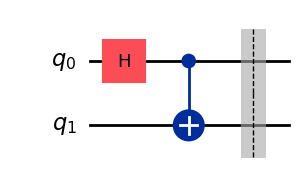

In [4]:
protocol = QuantumCircuit(2)

protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

display(protocol.draw(output="mpl"))

- The Hadamard gate (`H`) and the controlled-X (CNOT) gate create an entangled pair of qubits.
- The two qubits are now in a Bell state, ready for superdense coding.
- We use a barrier to separate this preparation stage from Alice’s actions in the protocol.

### Part (b): Using a Random Bit Generator to Randomly Choose c and d

To randomly choose the values of classical bits `c` and `d` (which Alice will encode), we introduce an additional qubit that serves as a random bit generator. This qubit is initialized, then measured to provide random values for `c` and `d`.

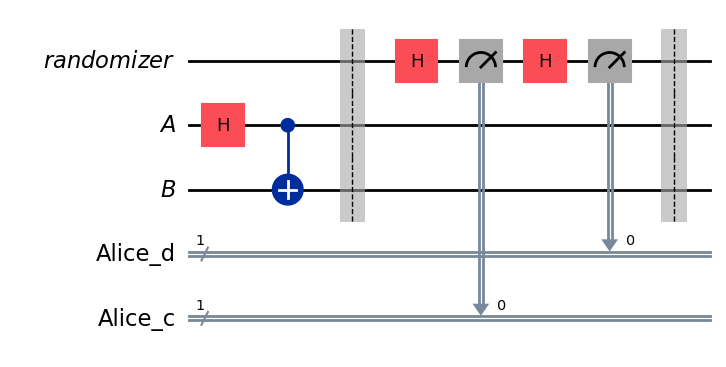

In [5]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice_c")
Alice_d = ClassicalRegister(1, "Alice_d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

display(test.draw(output="mpl"))


- A new qubit (`randomizer`) is used to generate random values for `c` and `d`.
- By applying the Hadamard gate, the qubit is put into a superposition, and each measurement collapses the state to `0` or `1` randomly.
- The measurement results are stored in the classical registers `Alice_c` and `Alice_d`.

### Part (c): Running the Superdense Coding Protocol and Verifying Alice and Bob’s Bits

Now that Alice has `c` and `d`, she will encode these values onto her qubit by applying the appropriate gates (X or Z). Afterward, Bob will perform a series of operations to retrieve the bits and measure to verify correctness.

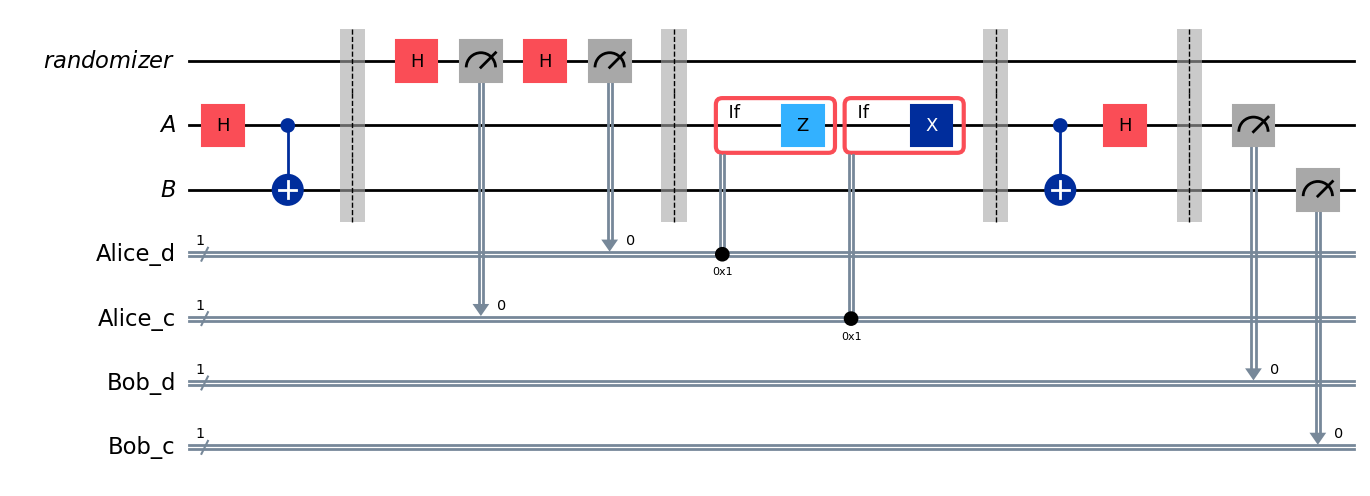

In [6]:
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob_c")
Bob_d = ClassicalRegister(1, "Bob_d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output="mpl"))


- **Alice's encoding**: Conditional operations (X or Z gates) are applied to Alice's qubit based on the values of `c` and `d`.
- **Bob's decoding**: After receiving Alice's qubit, Bob applies a CNOT and a Hadamard gate to decode the state.
- **Measurement**: The result is measured into classical registers `Bob_c` and `Bob_d`.


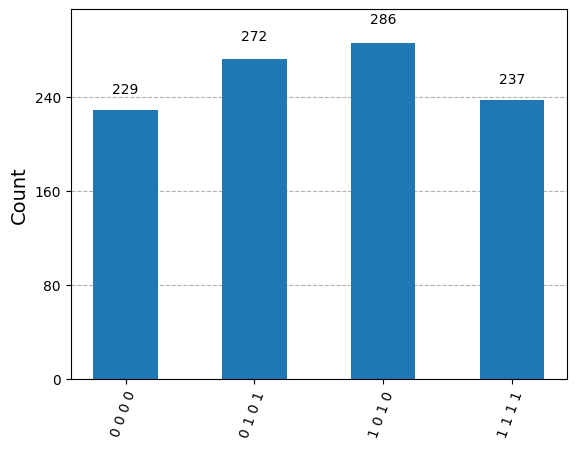

In [7]:
simulator = AerSimulator()
result = simulator.run(test).result()
statistics = result.get_counts()

display(plot_histogram(statistics))

- This simulation shows that Bob’s measurement outcomes match Alice's randomly chosen values of `c` and `d`.
- The histogram confirms successful transmission of the bits via the superdense coding protocol.

The protocol completes with Alice and Bob’s classical bits aligning as expected, verifying the accuracy of superdense coding through the quantum simulator.